In [1]:
import sys
import numpy as np
from sklearn.metrics import confusion_matrix

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
from tensorflow.python.keras.layers import LeakyReLU
import scipy as sp
import scipy.io as spio
import matplotlib.pylab as pl

from tensorflow.python import keras
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Flatten, Conv1D, Dropout, MaxPooling1D, Reshape, GlobalAveragePooling1D
from tensorflow.python.keras.utils import np_utils

import keras.backend as K

config = K.tf.ConfigProto()
config.gpu_options.allow_growth = True
#session = K.tf.Session(config=config)


Using TensorFlow backend.


In [2]:

dataset = np.loadtxt("datalast.csv",delimiter=",")
X = dataset[:,0:177]
y = dataset[:,178]


#print(X[0].shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(y)


print(X_train.shape)
print (y_train.shape)

[4. 1. 5. ... 5. 3. 4.]
(9200, 177)
(9200,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
y_train = y_train.reshape(y_train.shape[0],1)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_test = y_test.reshape(y_test.shape[0],1)


print(X_train.shape)
print (y_train.shape)

print(X_test.shape)
print(y_test.shape)

(9200, 177, 1)
(9200, 1)
(2300, 177, 1)
(2300, 1)


In [4]:
y_train_hot = np_utils.to_categorical(y_train-1, 5) # subtracting y_train-1 as keras starts num_Classes index from 0 and we had it from 1 to 5
print('New y_train shape: ', y_train_hot.shape)

y_test_hot = np_utils.to_categorical(y_test-1, 5) # subtracting y_train-1 as keras starts num_Classes index from 0 and we had it from 1 to 5
print('New y_test shape: ', y_test_hot.shape)

New y_train shape:  (9200, 5)
New y_test shape:  (2300, 5)


In [6]:
model= Sequential()
model.add(Conv1D(4, 6, strides=1,input_shape=(177,1)))
model.add(Conv1D(4, 6, strides=1,input_shape=(177,1)))

model.add(MaxPooling1D(4, strides=2))
model.add(Dropout(0.15))

model.add(Conv1D(4, 5, strides=1, padding='same'))
model.add(Conv1D(4, 5, strides=1, padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(4, strides=2))
model.add(Dropout(0.15))

model.add(Conv1D(10, 4,strides=1 , padding='same'))
model.add(Conv1D(10, 4,strides=1 , padding='same'))

model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(10, strides=2))
model.add(Dropout(0.15))


model.add(Conv1D(10, 4, strides=1 , padding='same'))
model.add(Conv1D(10, 4, strides=1 , padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(10, strides=2))
model.add(Dropout(0.15))

model.add(Conv1D(15, 4, strides=1 , padding='same'))
model.add(Conv1D(15, 4, strides=1 , padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling1D(15, strides=2 , padding='same'))
model.add(Dropout(0.15))

model.add(GlobalAveragePooling1D())
#model.add(Dropout(0.15))
model.add(Dense (50))
model.add(Dense (20))
model.add(Dense (5,activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 172, 4)            28        
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 167, 4)            100       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 82, 4)             0         
_________________________________________________________________
dropout (Dropout)            (None, 82, 4)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 82, 4)             84        
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 82, 4)             84        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 82, 4)             0         
__________

Train on 7360 samples, validate on 1840 samples
Epoch 1/300
7360/7360 [==============================] - 2s 332us/step - loss: 6.6198 - acc: 0.2037 - val_loss: 1.6855 - val_acc: 0.1908
Epoch 2/300
7360/7360 [==============================] - 0s 21us/step - loss: 1.8360 - acc: 0.2628 - val_loss: 1.4485 - val_acc: 0.3391
Epoch 3/300
7360/7360 [==============================] - 0s 21us/step - loss: 1.4055 - acc: 0.3311 - val_loss: 1.4633 - val_acc: 0.3299
Epoch 4/300
7360/7360 [==============================] - 0s 20us/step - loss: 1.3556 - acc: 0.3963 - val_loss: 1.4136 - val_acc: 0.3500
Epoch 5/300
7360/7360 [==============================] - 0s 19us/step - loss: 1.3275 - acc: 0.4125 - val_loss: 1.4071 - val_acc: 0.3315
Epoch 6/300
7360/7360 [==============================] - 0s 20us/step - loss: 1.3078 - acc: 0.4264 - val_loss: 1.3966 - val_acc: 0.3196
Epoch 7/300
7360/7360 [==============================] - 0s 21us/step - loss: 1.2831 - acc: 0.4390 - val_loss: 1.3815 - val_acc: 0.3152

7360/7360 [==============================] - 0s 20us/step - loss: 0.7248 - acc: 0.6645 - val_loss: 0.8116 - val_acc: 0.6190
Epoch 61/300
7360/7360 [==============================] - 0s 19us/step - loss: 0.7169 - acc: 0.6685 - val_loss: 0.7693 - val_acc: 0.6429
Epoch 62/300
7360/7360 [==============================] - 0s 20us/step - loss: 0.7047 - acc: 0.6707 - val_loss: 0.7996 - val_acc: 0.6245
Epoch 63/300
7360/7360 [==============================] - 0s 21us/step - loss: 0.7140 - acc: 0.6707 - val_loss: 0.7784 - val_acc: 0.6424
Epoch 64/300
7360/7360 [==============================] - 0s 22us/step - loss: 0.7138 - acc: 0.6747 - val_loss: 0.8512 - val_acc: 0.6082
Epoch 65/300
7360/7360 [==============================] - 0s 23us/step - loss: 0.7055 - acc: 0.6747 - val_loss: 0.7801 - val_acc: 0.6315
Epoch 66/300
7360/7360 [==============================] - 0s 23us/step - loss: 0.6996 - acc: 0.6755 - val_loss: 0.7654 - val_acc: 0.6500
Epoch 67/300
7360/7360 [==============================

Epoch 120/300
7360/7360 [==============================] - 0s 22us/step - loss: 0.6502 - acc: 0.6948 - val_loss: 0.7489 - val_acc: 0.6549
Epoch 121/300
7360/7360 [==============================] - 0s 22us/step - loss: 0.6492 - acc: 0.6925 - val_loss: 0.7476 - val_acc: 0.6620
Epoch 122/300
7360/7360 [==============================] - 0s 23us/step - loss: 0.6463 - acc: 0.6955 - val_loss: 0.7260 - val_acc: 0.6668
Epoch 123/300
7360/7360 [==============================] - 0s 22us/step - loss: 0.6587 - acc: 0.6967 - val_loss: 0.7587 - val_acc: 0.6598
Epoch 124/300
7360/7360 [==============================] - 0s 21us/step - loss: 0.6498 - acc: 0.6933 - val_loss: 0.7211 - val_acc: 0.6571
Epoch 125/300
7360/7360 [==============================] - 0s 20us/step - loss: 0.6522 - acc: 0.6895 - val_loss: 0.7823 - val_acc: 0.6380
Epoch 126/300
7360/7360 [==============================] - 0s 22us/step - loss: 0.6429 - acc: 0.6978 - val_loss: 0.7707 - val_acc: 0.6473
Epoch 127/300
7360/7360 [=========

7360/7360 [==============================] - 0s 23us/step - loss: 0.6123 - acc: 0.7194 - val_loss: 0.7147 - val_acc: 0.6603
Epoch 180/300
7360/7360 [==============================] - 0s 19us/step - loss: 0.6213 - acc: 0.7122 - val_loss: 0.7095 - val_acc: 0.6723
Epoch 181/300
7360/7360 [==============================] - 0s 20us/step - loss: 0.6228 - acc: 0.7130 - val_loss: 0.6920 - val_acc: 0.6913
Epoch 182/300
7360/7360 [==============================] - 0s 20us/step - loss: 0.6148 - acc: 0.7103 - val_loss: 0.7154 - val_acc: 0.6739
Epoch 183/300
7360/7360 [==============================] - 0s 20us/step - loss: 0.6192 - acc: 0.7198 - val_loss: 0.6995 - val_acc: 0.6875
Epoch 184/300
7360/7360 [==============================] - 0s 20us/step - loss: 0.6142 - acc: 0.7160 - val_loss: 0.6940 - val_acc: 0.6750
Epoch 185/300
7360/7360 [==============================] - 0s 20us/step - loss: 0.6152 - acc: 0.7209 - val_loss: 0.7275 - val_acc: 0.6582
Epoch 186/300
7360/7360 [=======================

7360/7360 [==============================] - 0s 20us/step - loss: 0.5901 - acc: 0.7337 - val_loss: 0.7044 - val_acc: 0.6712
Epoch 239/300
7360/7360 [==============================] - 0s 19us/step - loss: 0.5921 - acc: 0.7284 - val_loss: 0.7091 - val_acc: 0.6815
Epoch 240/300
7360/7360 [==============================] - 0s 22us/step - loss: 0.5948 - acc: 0.7269 - val_loss: 0.6938 - val_acc: 0.6832
Epoch 241/300
7360/7360 [==============================] - 0s 22us/step - loss: 0.5920 - acc: 0.7304 - val_loss: 0.6776 - val_acc: 0.6875
Epoch 242/300
7360/7360 [==============================] - 0s 20us/step - loss: 0.5958 - acc: 0.7285 - val_loss: 0.6853 - val_acc: 0.6848
Epoch 243/300
7360/7360 [==============================] - 0s 20us/step - loss: 0.5950 - acc: 0.7240 - val_loss: 0.7040 - val_acc: 0.6745
Epoch 244/300
7360/7360 [==============================] - 0s 22us/step - loss: 0.5914 - acc: 0.7308 - val_loss: 0.6724 - val_acc: 0.6886
Epoch 245/300
7360/7360 [=======================

7360/7360 [==============================] - 0s 21us/step - loss: 0.5458 - acc: 0.7397 - val_loss: 0.6196 - val_acc: 0.7087
Epoch 298/300
7360/7360 [==============================] - 0s 22us/step - loss: 0.5384 - acc: 0.7457 - val_loss: 0.6130 - val_acc: 0.7076
Epoch 299/300
7360/7360 [==============================] - 0s 22us/step - loss: 0.5448 - acc: 0.7424 - val_loss: 0.6106 - val_acc: 0.7114
Epoch 300/300
2300/2300 [==============================] - 0s 56us/step
acc: 69.57%
Confusion matrix:
 [[412  29   1   4   0]
 [  5 155 232   2  66]
 [  0  78 288   1  63]
 [  0   1   4 285 185]
 [  0   1  23   5 460]]


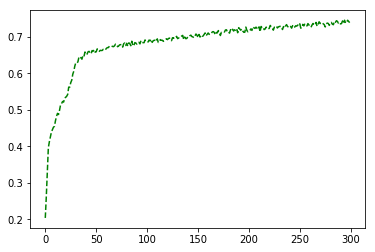

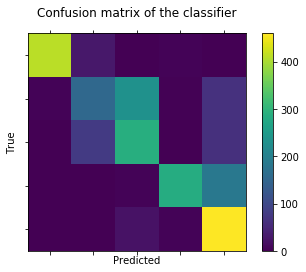


--- Learning curve of model training ---



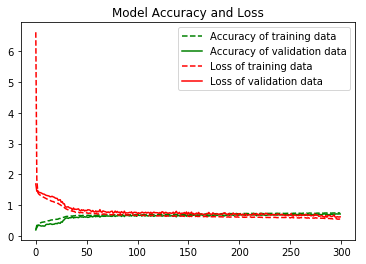

In [7]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
history=model.fit(X_train, y_train_hot, batch_size = 400, epochs=300 ,validation_split=0.2, verbose=1)


pl.plot(history.history['acc'], "g--", label="Accuracy of training data")
#evaluate the model
scores=model.evaluate(X_test, y_test_hot, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

predictions = model.predict(X_test)
y_test_hot = np.argmax(y_test_hot, axis=-1)
predictions = np.argmax(predictions, axis=-1)
c = confusion_matrix(y_test_hot, predictions)
print('Confusion matrix:\n', c)
fig = pl.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(c)
pl.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] )
ax.set_yticklabels([''])
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()
print("\n--- Learning curve of model training ---\n")
pl.figure()
pl.plot(history.history['acc'], "g--", label="Accuracy of training data")
pl.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
pl.plot(history.history['loss'], "r--", label="Loss of training data")
pl.plot(history.history['val_loss'], "r", label="Loss of validation data")
pl.title('Model Accuracy and Loss')
pl.legend()
pl.show()